In [387]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [388]:
data=pd.read_csv('train.csv')
test_data=pd.read_csv('test.csv')
loanid=test_data['Loan_ID'].values

In [389]:
data=data.drop(columns='Loan_ID')
test_data=test_data.drop(columns='Loan_ID')
x=data.iloc[:,:-1].values
y=data.iloc[:,-1].values

In [390]:
X_test=test_data.iloc[:,:].values


In [391]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [392]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [393]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


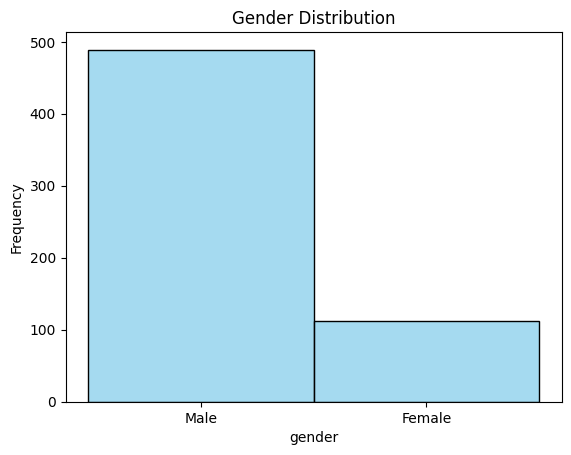

In [394]:
sns.histplot(data=data, x='Gender', kde=False, bins=2, color='skyblue', edgecolor='black')

plt.xlabel('gender')
plt.ylabel('Frequency')
plt.title('Gender Distribution')

# Show the plot
plt.show()


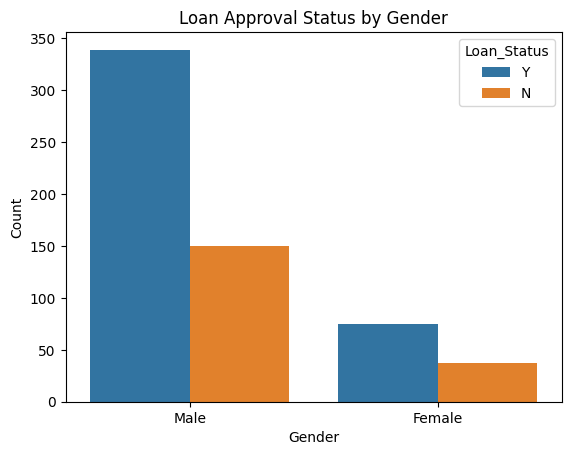

In [395]:
sns.countplot(data=data, x='Gender', hue='Loan_Status')

# Add labels and title
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Loan Approval Status by Gender')

# Show the plot
plt.show()


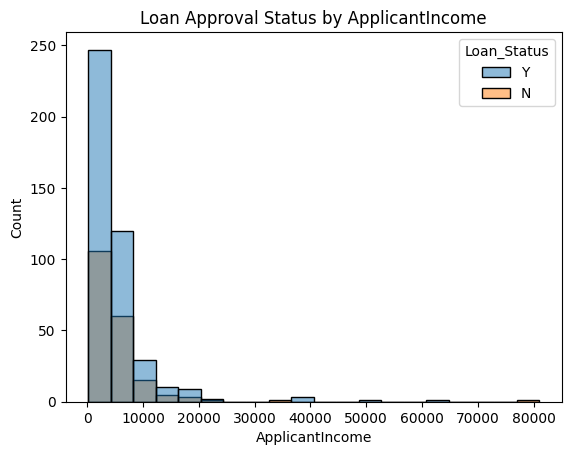

In [396]:
sns.histplot(data=data, x='ApplicantIncome', hue='Loan_Status', bins=20)

# Add labels and title
plt.xlabel('ApplicantIncome')
plt.ylabel('Count')
plt.title('Loan Approval Status by ApplicantIncome')

# Show the plot
plt.show()


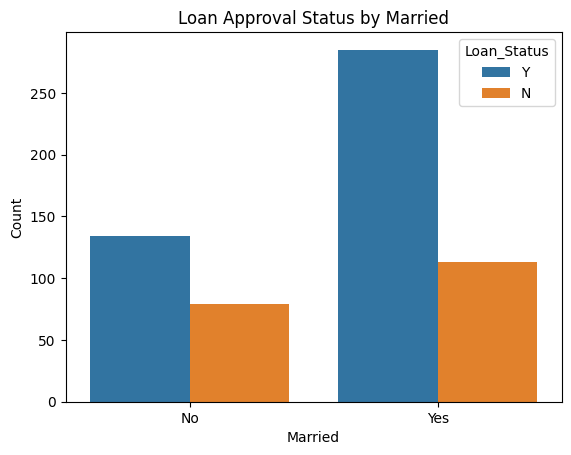

In [397]:
sns.countplot(data=data, x='Married', hue='Loan_Status')

# Add labels and title
plt.xlabel('Married')
plt.ylabel('Count')
plt.title('Loan Approval Status by Married')

# Show the plot
plt.show()

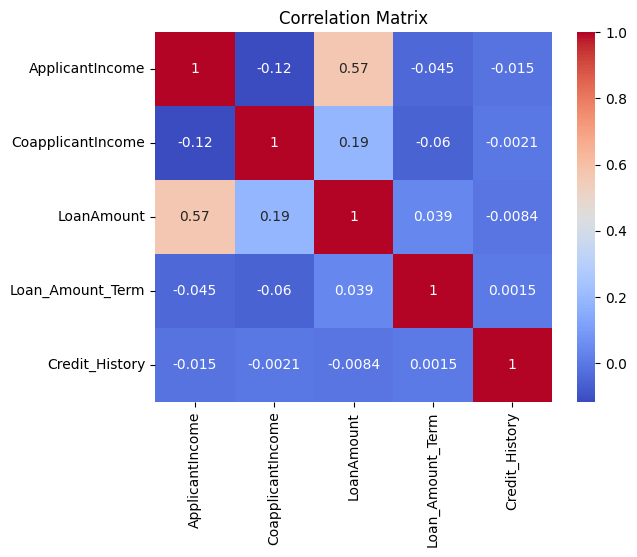

In [398]:
correlation_matrix = data.corr()

# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Add title
plt.title('Correlation Matrix')

# Show the plot
plt.show()


In [399]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [400]:
from sklearn.model_selection import train_test_split
X_train=x
Y_train=y

In [401]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan, strategy='median')
imputer.fit(X_train[:,5:9])
X_train[:,5:9]=imputer.transform(X_train[:,5:9])
X_test[:,5:9]=imputer.transform(X_test[:,5:9])


In [402]:
imputer2=SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputer2.fit(X_train[:,0:5])
X_train[:,0:5]=imputer2.transform(X_train[:,0:5])
X_test[:,0:5]=imputer2.transform(X_test[:,0:5])



In [403]:
imputer3=SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputer3.fit(X_train[:,9:10])
X_train[:,9:10]=imputer3.transform(X_train[:,9:10])
X_test[:,9:10]=imputer3.transform(X_test[:,9:10])

In [404]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
Y_train=le.fit_transform(Y_train)

In [405]:
X_train[0:6]

array([['Male', 'No', '0', 'Graduate', 'No', 5849.0, 0.0, 128.0, 360.0,
        1.0, 'Urban'],
       ['Male', 'Yes', '1', 'Graduate', 'No', 4583.0, 1508.0, 128.0,
        360.0, 1.0, 'Rural'],
       ['Male', 'Yes', '0', 'Graduate', 'Yes', 3000.0, 0.0, 66.0, 360.0,
        1.0, 'Urban'],
       ['Male', 'Yes', '0', 'Not Graduate', 'No', 2583.0, 2358.0, 120.0,
        360.0, 1.0, 'Urban'],
       ['Male', 'No', '0', 'Graduate', 'No', 6000.0, 0.0, 141.0, 360.0,
        1.0, 'Urban'],
       ['Male', 'Yes', '2', 'Graduate', 'Yes', 5417.0, 4196.0, 267.0,
        360.0, 1.0, 'Urban']], dtype=object)

In [406]:
X_test[0:6]

array([['Male', 'Yes', '0', 'Graduate', 'No', 5720.0, 0.0, 110.0, 360.0,
        1.0, 'Urban'],
       ['Male', 'Yes', '1', 'Graduate', 'No', 3076.0, 1500.0, 126.0,
        360.0, 1.0, 'Urban'],
       ['Male', 'Yes', '2', 'Graduate', 'No', 5000.0, 1800.0, 208.0,
        360.0, 1.0, 'Urban'],
       ['Male', 'Yes', '2', 'Graduate', 'No', 2340.0, 2546.0, 100.0,
        360.0, 1.0, 'Urban'],
       ['Male', 'No', '0', 'Not Graduate', 'No', 3276.0, 0.0, 78.0,
        360.0, 1.0, 'Urban'],
       ['Male', 'Yes', '0', 'Not Graduate', 'Yes', 2165.0, 3422.0, 152.0,
        360.0, 1.0, 'Urban']], dtype=object)

In [407]:
le1=LabelEncoder()
X_train[:,0]=le1.fit_transform(X_train[:,0])
X_test[:,0]=le1.transform(X_test[:,0])

In [408]:
le2=LabelEncoder()
X_train[:,1]=le2.fit_transform(X_train[:,1])
X_test[:,1]=le2.transform(X_test[:,1])

In [409]:
X_train[:,3]=le.fit_transform(X_train[:,3])
X_test[:,3]=le.transform(X_test[:,3])

In [410]:
X_train[:,4]=le.fit_transform(X_train[:,4])
X_test[:,4]=le.transform(X_test[:,4])

In [411]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct=ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[2,10])],remainder='passthrough')
X_train=np.array(ct.fit_transform(X_train))



In [412]:
X_test=np.array(ct.transform(X_test))


In [413]:
X_train[0]

array([1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1, 0, 0, 0, 5849.0, 0.0, 128.0,
       360.0, 1.0], dtype=object)

In [414]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [415]:
X_train= scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

In [421]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

model = LogisticRegression()

model.fit(X_train, Y_train)

y_pred = model.predict(X_test)
y_final=[]
for i in range(len(y_pred)):
    if(y_pred[i]==1):
        y_final.append('Y')
    else:
        y_final.append('N')

#accuracy = accuracy_score(y_test, y_pred)

# Generate a classification report
#report = classification_report(y_test, y_pred)

#print(f"Accuracy: {accuracy}")
#print(f"Classification Report:\n{report}")

In [422]:
#from sklearn.metrics import confusion_matrix
#cm = confusion_matrix(y_test, y_pred)

#print("Confusion Matrix:")
#print(cm)


In [423]:
'''
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=35, random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Generate a classification report
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{report}")

SyntaxError: EOF while scanning triple-quoted string literal (1000477033.py, line 18)

In [424]:
'''
cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(cm)

SyntaxError: EOF while scanning triple-quoted string literal (418853599.py, line 5)

In [426]:

import csv

combined_data = list(zip(loanid, y_final))

# Specify the file name
file_name = 'result.csv'

# Write to CSV
with open(file_name, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['Loan_ID', 'Loan_Status'])  # Write header
    writer.writerows(combined_data)  # Write data

print(f'{file_name} created successfully.')


result.csv created successfully.
